<a href="https://colab.research.google.com/github/yusuf-003/ArewaDS-Deep-Learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Sat Apr 16 03:23:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


1.10.0+cu111


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
# Health
# Automotive
# Agriculture

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
# Overfitting occurs during an ML or DL inference, at a time of training. the model try to memorise the training and fail to
# perorme well on the unseen data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
# Regularization
# Feature selection
# Data Argumentation

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [ ]:
# When uploading and image of an apple the image was divided into three diffrent color, although gray but (is channel).
#The image pixels are transformed into small churn and passes through the hidden layers and so on.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
import torchvision
import torchvision.transforms as transforms

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

## 6. Visualize at least 5 different samples of the MNIST training dataset.

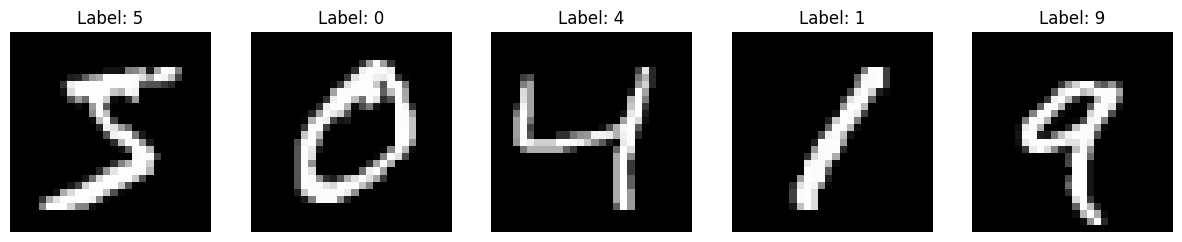

In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i in range(5):

    image, label = train_dataset[i]
    image = image.squeeze().numpy()

    # Plot the image
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')  # Hide the axes

plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [8]:
from torch.utils.data import DataLoader

# Setting the batch size
batch_size = 32

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Print the details of the DataLoaders
print(f"Train DataLoader: {len(train_loader)} batches of {batch_size}")
print(f"Test DataLoader: {len(test_loader)} batches of {batch_size}")

Train DataLoader: 1875 batches of 32
Test DataLoader: 313 batches of 32


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [9]:
import torch
import torch.nn as nn

class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

model = TinyVGG(input_shape=1, hidden_units=10, output_shape=10)
print(model)

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)


## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [11]:
# I really dont know whicxh exercise 8, the instructor is saying. However, the training on both CPU and GPU is as follow:

## Training on the CPU

In [12]:
import torch.optim as optim
import time

# Set random seed for reproducibility
torch.manual_seed(42)
epochs=5
# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam

#  train the model
def train_model(device, epochs):

    model = TinyVGG(input_shape=1, hidden_units=10, output_shape=10).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        train_loss, train_acc = 0, 0

        for batch_idx, (X, y) in enumerate(train_loader):
            X, y = X.to(device), y.to(device)

            y_logits = model(X)
            loss = loss_fn(y_logits, y)
            train_loss += loss.item()

            # Calculate accuracy
            y_pred = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
            train_acc += (y_pred == y).sum().item() / len(y)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Print training progress
        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        print(f"Epoch: {epoch + 1} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

    # End the timer
    end_time = time.time()
    total_time = end_time - start_time
    print(f"Training time on {device}: {total_time:.2f} seconds")

    return total_time


print("Training on CPU...")
cpu_time = train_model(device="cpu")


Training on CPU...
Epoch: 1 | Train Loss: 0.2585, Train Acc: 0.9211
Epoch: 2 | Train Loss: 0.0793, Train Acc: 0.9761
Epoch: 3 | Train Loss: 0.0590, Train Acc: 0.9817
Epoch: 4 | Train Loss: 0.0461, Train Acc: 0.9855
Epoch: 5 | Train Loss: 0.0387, Train Acc: 0.9878
Training time on cpu: 97.70 seconds


## Training on GPU

In [ ]:
import torch.optim as optim
import time

# Set random seed for reproducibility
torch.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam

def train_model(device, epochs=5):

    model = TinyVGG(input_shape=1, hidden_units=10, output_shape=10).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    start_time = time.time()


    for epoch in range(epochs):
        model.train()
        train_loss, train_acc = 0, 0

        for batch_idx, (X, y) in enumerate(train_loader):
            X, y = X.to(device), y.to(device)


            y_logits = model(X)
            loss = loss_fn(y_logits, y)
            train_loss += loss.item()

            y_pred = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
            train_acc += (y_pred == y).sum().item() / len(y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Print training progress
        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        print(f"Epoch: {epoch + 1} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

    # End the timer
    end_time = time.time()
    total_time = end_time - start_time
    print(f"Training time on {device}: {total_time:.2f} seconds")

    return total_time


print("Training on GPU ")
gpu_time = train_model(device="GPU")

In [16]:
# Compare training times
cpu_time = 97.70
gpu_time =
print(f"Training time on CPU is : {97.70} seconds")
print(f"Training time on CPU is : {97.70} seconds")
# Return max Time
max = max(cpu_time, gpu_time)
print(f"The max time is : {max} seconds")
print(f"Speedup: {cpu_time / gpu_time:.2f}x")

Training time on CPU is : 97.7 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

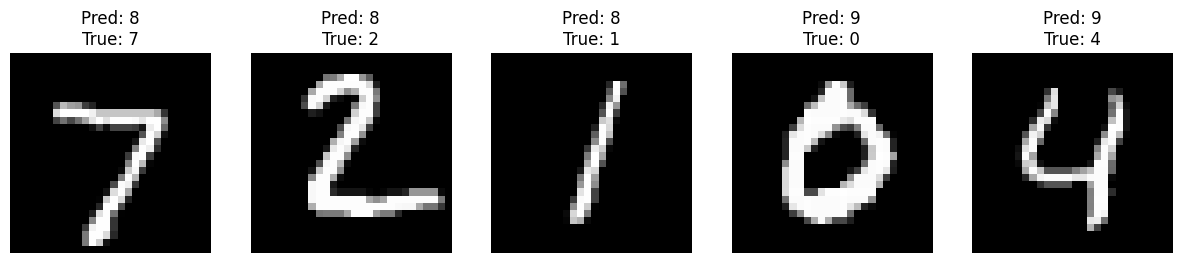

In [18]:
import matplotlib.pyplot as plt
import torch


model.eval()

with torch.inference_mode():
    test_samples, test_labels = next(iter(test_loader))
    #test_samples, test_labels = test_samples.to(device), test_labels.to(device)
    test_logits = model(test_samples)
    test_pred_probs = torch.softmax(test_logits, dim=1)
    test_pred_labels = torch.argmax(test_pred_probs, dim=1)

# Move data back to CPU for visualization
test_samples = test_samples.cpu()
test_labels = test_labels.cpu()
test_pred_labels = test_pred_labels.cpu()

# Visualize at least 5 samples
num_samples_to_plot = 5
plt.figure(figsize=(15, 3))
for i in range(num_samples_to_plot):
    # Plot the image
    plt.subplot(1, num_samples_to_plot, i + 1)
    plt.imshow(test_samples[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {test_pred_labels[i]}\nTrue: {test_labels[i]}")
    plt.axis('off')

plt.show()

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

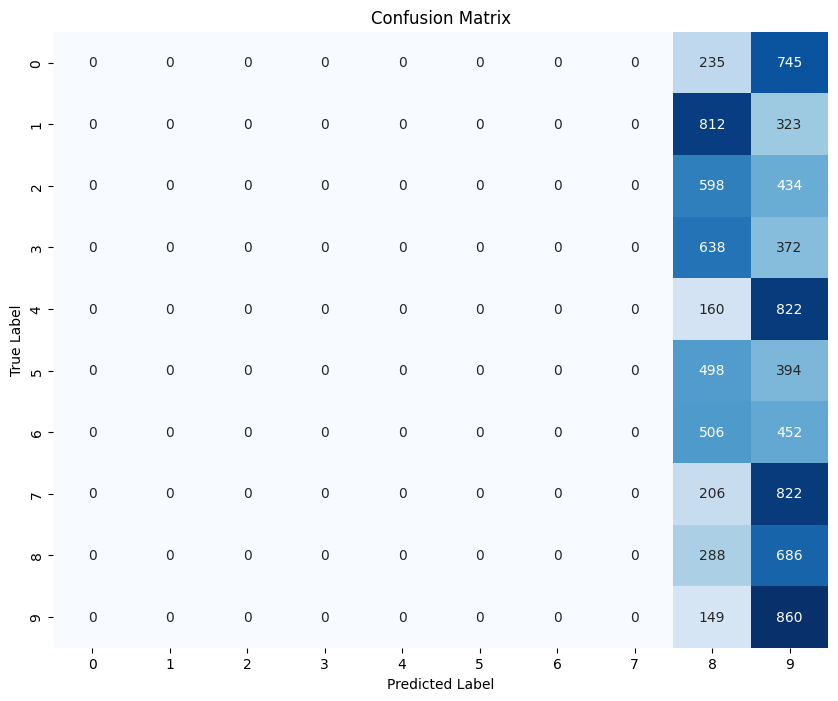

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Initialize lists to store predictions and true labels
all_preds = []
all_labels = []

# Make predictions on the entire test dataset
with torch.inference_mode():
    for X, y in test_loader:
        # Move data to the device
        #X, y = X.to(device), y.to(device)

        # Forward pass (get logits)
        y_logits = model(X)

        # Convert logits to prediction labels
        y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

        # Append predictions and true labels
        all_preds.extend(y_preds.cpu().numpy())
        all_labels.extend(y.cpu().numpy())

# Compute the confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [23]:
import torch
import torch.nn as nn

random_tensor = torch.randn(1, 3, 64, 64)

# Conv2d with different kernel sizes
def apply_conv2d(input_tensor, kernel_size):

    conv_layer = nn.Conv2d(
        in_channels=3,
        out_channels=16,
        kernel_size=kernel_size,
        stride=1,
        padding=0
    )


    output_tensor = conv_layer(input_tensor)
    return output_tensor


kernel_sizes = [1, 3, 5, 7]
for kernel_size in kernel_sizes:
    output = apply_conv2d(random_tensor, kernel_size)
    print(f"Kernel size: {kernel_size}, Output shape: {output.shape}")

Kernel size: 1, Output shape: torch.Size([1, 16, 64, 64])
Kernel size: 3, Output shape: torch.Size([1, 16, 62, 62])
Kernel size: 5, Output shape: torch.Size([1, 16, 60, 60])
Kernel size: 7, Output shape: torch.Size([1, 16, 58, 58])


In [ ]:
# As the kernel increases, the output decreases.

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [47]:
#importing the necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [48]:
# Set random seed
torch.manual_seed(42)

In [49]:
# Load dataset
transform = transforms.ToTensor()
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

In [50]:
#Creating a DataLoaders for both training and testing
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [56]:
# Define the model of TinyVGG
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

In [57]:
# Instantiating the model
model = TinyVGG(input_shape=1, hidden_units=10, output_shape=10)

In [58]:
# Define loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs =5

In [59]:
# train the model

def train_model(device, epochs):

    model = TinyVGG(input_shape=1, hidden_units=10, output_shape=10).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    start_time = time.time()

    for epoch in range(epochs):
        model.train()
        train_loss, train_acc = 0, 0

        for batch_idx, (X, y) in enumerate(train_loader):
            X, y = X.to(device), y.to(device)

            y_logits = model(X)
            loss = loss_fn(y_logits, y)
            train_loss += loss.item()

            # Calculate accuracy
            y_pred = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)
            train_acc += (y_pred == y).sum().item() / len(y)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Print training progress
            train_loss /= len(train_loader)
            train_acc /= len(train_loader)
            print(f"Epoch: {epoch + 1} | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")

In [60]:
# Make predictions on the test dataset
model.eval()
incorrect_samples = []  # Store incorrect predictions

with torch.inference_mode():
    for X, y in test_loader:
        # Forward pass
        y_logits = model(X)
        y_preds = torch.argmax(torch.softmax(y_logits, dim=1), dim=1)

        # Find incorrect predictions
        incorrect_mask = y_preds != y
        incorrect_samples.extend(list(zip(X[incorrect_mask], y_preds[incorrect_mask], y[incorrect_mask])))

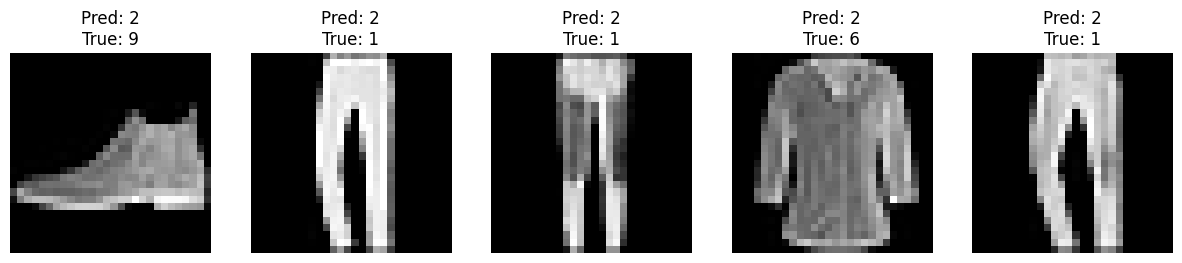

In [61]:
 #Visualize some incorrect predictions
num_samples_to_plot = 5
plt.figure(figsize=(15, 3))
for i, (image, pred, true) in enumerate(incorrect_samples[:num_samples_to_plot]):
    # Convert image tensor to numpy array
    image = image.squeeze().numpy()

    # Plot the image
    plt.subplot(1, num_samples_to_plot, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Pred: {pred.item()}\nTrue: {true.item()}")
    plt.axis('off')

plt.show()